# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Michelle Angelina
- Email: zmichelleangelina@gmail.com
- ID Dicoding: mchelle_angelina

**Problem Statement:**  
  - Faktor utama apa saja yang paling berpengaruh terhadap keputusan siswa untuk dropout?
  - Apa saja feature pendukung keputusan dropout yang paling memengaruhi secara tidak langsung ke faktor-faktor tersebut?

## Persiapan

Tahap awal ini mencakup instalasi dan import library yang dibutuhkan untuk analisis data dan pembuatan model, seperti pandas, numpy, matplotlib, seaborn, dan library machine learning seperti scikit-learn atau xgboost.

### Menyiapkan library yang dibutuhkan

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, log_loss, classification_report, roc_curve, accuracy_score,
    confusion_matrix, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

import statsmodels.api as sm
import statsmodels.formula.api as smf
from imblearn.over_sampling import SMOTE

import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History, ReduceLROnPlateau

from IPython.display import display
from ipywidgets import FileUpload

!pip freeze > requirements.txt /dev/null 2>&1
!cat requirements.txt /dev/null 2>&1

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.28.0.37.27
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.1
bokeh==3.7.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
commun

### Menyiapkan data yang akan digunakan

In [ ]:
df = pd.read_csv('data.csv', sep=';')

Data dalam file csv dengan separator titik koma. Hal ini wajib diperhatikan ketika membaca file csv sebagai df supaya data dapat dipisah dengan benar.

## Data Understanding

### Data Information

In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Tidak ada data yang null. Data lengkap tidak ada missing values.

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


- Terdapat 4424 baris data dengan 37 kolom informasi.
- Jumlah count semua berjumlah 4424 baris data yang berarti tidak ada missing values, data sudah lengkap.

In [ ]:
df.nunique()

,0
Marital_status,6
Application_mode,18
Application_order,8
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,21
Mothers_qualification,29
Fathers_qualification,34


- Semua kolom memiliki dua atau lebih data yang unik.
- Beberapa kolom kategorikal dengan variasi data 2-9 bisa diberikan Encoding.
- **Kolom Biner:**
  - `Daytime_evening_attendance`
  - `Displaced`
  - `Educational_special_needs`
  - `Debtor`
  - `Tuition_fees_up_to_date`
  - `Gender`
  - `Scholarship_holder`
  - `International`

- **Kolom dengan Potensi Distribusi Skewed (miring):**
  - `Previous_qualification_grade`: banyak nilai mendekati rata-rata, tapi bisa sampai 190.
  - `Admission_grade`: sebagian besar tinggi, tapi ada variasi besar, akan ditinjau.
  - `Curricular_units_1st_sem_grade` dan `Curricular_units_2nd_sem_grade`: banyak yang gagal (nilai 0), sisanya naik drastis.
  - `Curricular_units_1st/2nd_sem_approved`
  - `GDP`, `Unemployment_rate`, `Inflation_rate`: bisa miring, akan ditinjau lebih lanjut lagi.

- **Kolom dengan Banyak Nilai Unik:**
  - `Application_mode` (18 kategori)
  - `Previous_qualification` (17 kategori)
  - `Course` (17 kategori)
  - `Nacionality` (21 kategori)
  - `Mothers_qualification` (29 kategori)
  - `Fathers_qualification` (34 kategori)
  - `Mothers_occupation` (32 kategori)
  - `Fathers_occupation` (46 kategori)

- **Kolom Numerik Kontinu:**
  - `Admission_grade`
  - `Previous_qualification_grade`
  - `Age_at_enrollment`
  - `Curricular_units_1st_sem_grade`
  - `Curricular_units_2nd_sem_grade`
  - `GDP`
  - `Inflation_rate`
  - `Unemployment_rate`

- **Kolom Target untuk Prediksi:**
  - `Status`, 3 kelas: kemungkinan *Graduate*, *Dropout*, dan *Enrolled*.


In [ ]:
df['Status'].value_counts(normalize=True)

,proportion
Status,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


Penjelasan: Status - Students' Enrollment Status (Graduate, Dropout, Enrolled)

- Sekitar 32% siswa berstatus dropout, **Dropout Rate: 32%**.
- Ada ketidakseimbangan data jika digunakan untuk membuat model machine learning. Kelas Enrolled jauh lebih kecil (~18%) dibanding dua lainnya.

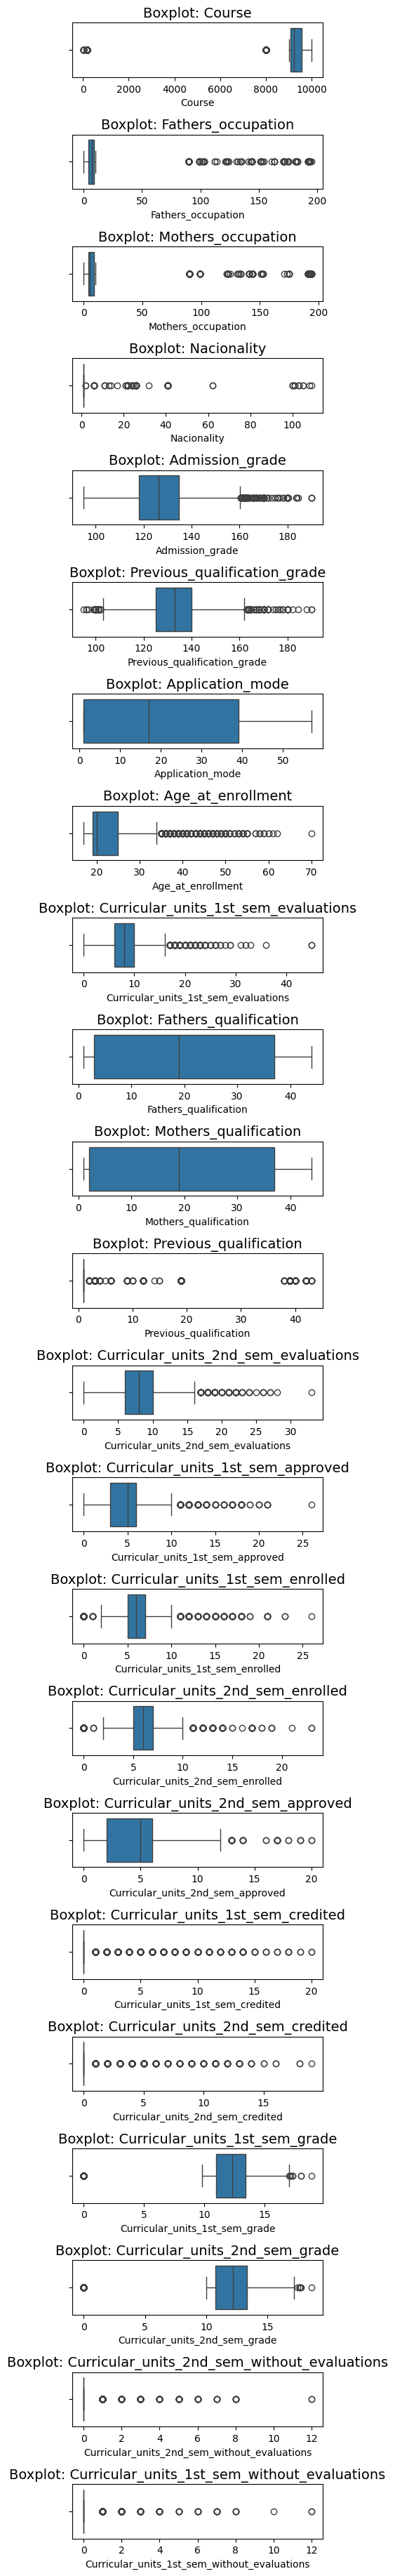

In [ ]:
# Handle data range
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
range_df = df[numerical_cols].apply(lambda x: x.max() - x.min()).sort_values(ascending=False)
suspect_cols = range_df[range_df > 10].index.tolist()

plt.figure(figsize=(4, len(suspect_cols) * 1.6))

for i, col in enumerate(suspect_cols):
    plt.subplot(len(suspect_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}', fontsize=14)
plt.tight_layout()
plt.show()

- **Right‐skewed (banyak nilai rendah, sedikit outlier tinggi):**  
  - `Course`, `Application_mode`, `Age_at_enrollment`, `Fathers_occupation`, `Mothers_occupation`, `Nacionality`.
  - **Semua** fitur "`Curricular_units`" (`evaluations`, `enrolled`, `approved`, `credited`, `without_evaluations`).

  - Secara umum, tidak ada batasan usia `Age_at_enrollment` untuk mendapatkan gelar sarjana di seluruh dunia.
  - Angka-angka tersebut merupakan kode `Couse`, kode kategori untuk `Fathers_occupation`, `Mothers_occupation`, dan `Nacionality`.

- **Relatif simetris (distribusi sekitar pusat, outlier kedua sisi):**  
  - `Admission_grade`, `Previous_qualification_grade`, `Curricular_units_1st_sem_grade`, dan `Curricular_units_2nd_sem_grade`.

- **Hampir uniform/tanpa skew signifikan:**  
  - `Fathers_qualification`, `Mothers_qualification`, dan `Previous_qualification`.

 ### Kesimpulan:
- Terdapat 4424 baris data dengan 37 kolom informasi
- Semua kolom memiliki dua atau lebih data yang unik
- Tidak ada missing values, data sudah lengkap
- Sekitar 32% siswa berstatus dropout, **Dropout Rate: 32%**
- Kelas *Enrolled* jauh lebih kecil (~18%) dibanding dua kelas lainnya, yang menunjukkan adanya ketidakseimbangan data untuk pemodelan machine learning
- Semua kolom informasi sudah dalam bentuk int dan float kecuali `Status`
- Untuk Kolom dengan distribusi Right-skewed masih termasuk dalam angka yang normal, tidak ada value yang skewed

## Data Preparation / Preprocessing

Tahapan ini mencakup transformasi fitur (normalisasi, encoding), dan pembuatan fitur baru (feature engineering).

In [ ]:
df = pd.read_csv('data.csv', sep=';')
df.to_csv('data_students.csv', index=False)

In [ ]:
df = pd.read_csv('data.csv', sep=';')

categorical_cols = ['Status']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

joblib.dump(encoders, 'label_encoders.pkl')
df.to_csv('data_modeling.csv', index=False)

In [ ]:
df = pd.read_csv('data_modeling.csv')

def safe_divide(numerator, denominator):
    return numerator / denominator.replace(0, np.nan)

# pass rate
df['pass_rate_1st'] = safe_divide(df['Curricular_units_1st_sem_approved'], df['Curricular_units_1st_sem_enrolled'])
df['pass_rate_2nd'] = safe_divide(df['Curricular_units_2nd_sem_approved'], df['Curricular_units_2nd_sem_enrolled'])
df['pass_rate_total'] = safe_divide(
    df['Curricular_units_1st_sem_approved'] + df['Curricular_units_2nd_sem_approved'],
    df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled']
)

# missing evaluation
df['missing_eval_1st'] = safe_divide(df['Curricular_units_1st_sem_without_evaluations'], df['Curricular_units_1st_sem_enrolled'])
df['missing_eval_2nd'] = safe_divide(df['Curricular_units_2nd_sem_without_evaluations'], df['Curricular_units_2nd_sem_enrolled'])
df['missing_eval_total'] = safe_divide(
    df['Curricular_units_1st_sem_without_evaluations'] + df['Curricular_units_2nd_sem_without_evaluations'],
    df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled']
)

# grade
df['avg_grade'] = (df['Curricular_units_1st_sem_grade'] + df['Curricular_units_2nd_sem_grade']) / 2
df['grade_gap'] = df['Admission_grade'] - df['avg_grade']

# academic stats
df['total_enrolled'] = df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled']
df['total_approved'] = df['Curricular_units_1st_sem_approved'] + df['Curricular_units_2nd_sem_approved']
df['total_evaluations'] = df['Curricular_units_1st_sem_evaluations'] + df['Curricular_units_2nd_sem_evaluations']
df['total_failed'] = df['total_enrolled'] - df['total_approved']
df['unit_completion_ratio'] = safe_divide(df['total_approved'], df['total_enrolled'])

# financial and special case risk
df['financial_risk'] = (1 - df['Tuition_fees_up_to_date']) + df['Debtor'] + df['Scholarship_holder']
df['special_case'] = df['Displaced'] + df['Educational_special_needs'] + df['International']

df.fillna(0, inplace=True)

X = df.drop(['Status', 'missing_eval_1st', 'missing_eval_2nd', 'pass_rate_1st', 'pass_rate_2nd'], axis=1)
y = df['Status']

num_classes = y.nunique()
print(f"Number of unique classes: {num_classes}")

Number of unique classes: 3


0 - Dropout,
1 - Enrolled,
2 - Graduate

Data telah siap dilatih. Kelas status telah diubah menggunakan label encoder. Data juga telah melewati tahap feature engineering untuk melihat feature-feature yang dapat berpengaruh terhadap status mahasiswa.

## Modeling

Pemilihan dan pelatihan model machine learning dilakukan di tahap ini. Beberapa model bisa digabungkan (Deep Learning, Random Forest, dan XGBoost) untuk membentuk model Ensemble. Data dipisah menjadi 80% training dan 20% testing.

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "scaler_columns.pkl")

# SMOTE untuk imbalance
sm = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

# random forest
rf = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=4, random_state=42, class_weight='balanced')
rf.fit(X_train_sm, y_train_sm)
y_proba_rf = rf.predict_proba(X_test_scaled)

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                               max_depth=6, n_estimators=200, learning_rate=0.05,
                               random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)

# deep learning
model_dl = Sequential([
    Dense(256, input_dim=X_train_sm.shape[1]),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 kelas
])
model_dl.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model_dl.fit(
    X_train_sm, y_train_sm,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[reduce_lr],
    verbose=1
)

y_proba_dl = model_dl.predict(X_test_scaled)

# ensemble
X_meta = np.hstack([y_proba_rf, y_proba_xgb, y_proba_dl])
meta_model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=500)
meta_model.fit(X_meta, y_test)
y_proba_meta = meta_model.predict_proba(X_meta)

y_pred_meta = np.argmax(y_proba_meta, axis=1)

Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5705 - loss: 1.0441 - val_accuracy: 0.7062 - val_loss: 0.7044 - learning_rate: 0.0010
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6835 - loss: 0.7569 - val_accuracy: 0.7277 - val_loss: 0.6561 - learning_rate: 0.0010
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7056 - loss: 0.6902 - val_accuracy: 0.7096 - val_loss: 0.6565 - learning_rate: 0.0010
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7327 - loss: 0.6396 - val_accuracy: 0.7311 - val_loss: 0.6265 - learning_rate: 0.0010
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7418 - loss: 0.6257 - val_accuracy: 0.7051 - val_loss: 0.6743 - learning_rate: 0.0010
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7529 - loss: 0.6072 - val_accuracy: 0.7243 - val_loss: 0.6456 - learning_rate: 0.0010
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7585 - loss: 0.

## Evaluation

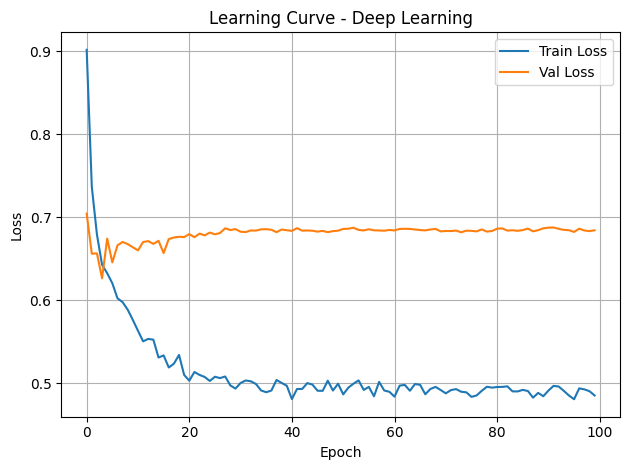

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Learning Curve - Deep Learning")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ensemble Dropout Detection
              precision    recall  f1-score   support

     Dropout       0.81      0.77      0.79       284
    Enrolled       0.58      0.43      0.49       159
    Graduate       0.81      0.91      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.70      0.71       885
weighted avg       0.77      0.78      0.77       885



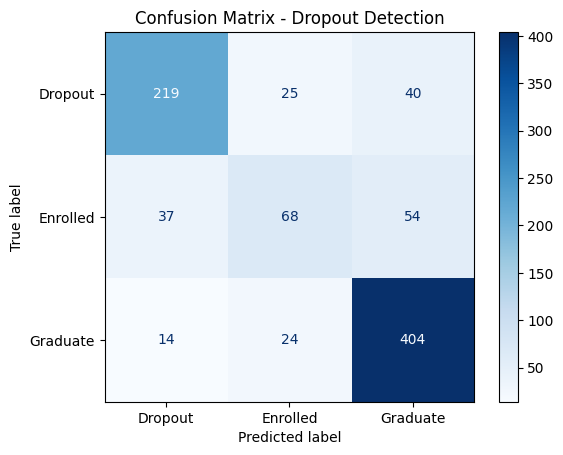

Akurasi: 0.7808
Log Loss: 0.5660
ROC AUC: 0.8911


In [ ]:
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)
if y_pred_meta.ndim > 1:
    y_pred_meta = np.argmax(y_pred_meta, axis=1)

print("Ensemble Dropout Detection")
print(classification_report(y_test, y_pred_meta, target_names=["Dropout", "Enrolled", "Graduate"]))

cm = confusion_matrix(y_test, y_pred_meta)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Dropout", "Enrolled", "Graduate"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Dropout Detection")
plt.show()

print(f"Akurasi: {accuracy_score(y_test, y_pred_meta):.4f}")
print(f"Log Loss: {log_loss(y_test, y_proba_meta):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_meta, multi_class='ovr', average='macro'):.4f}")

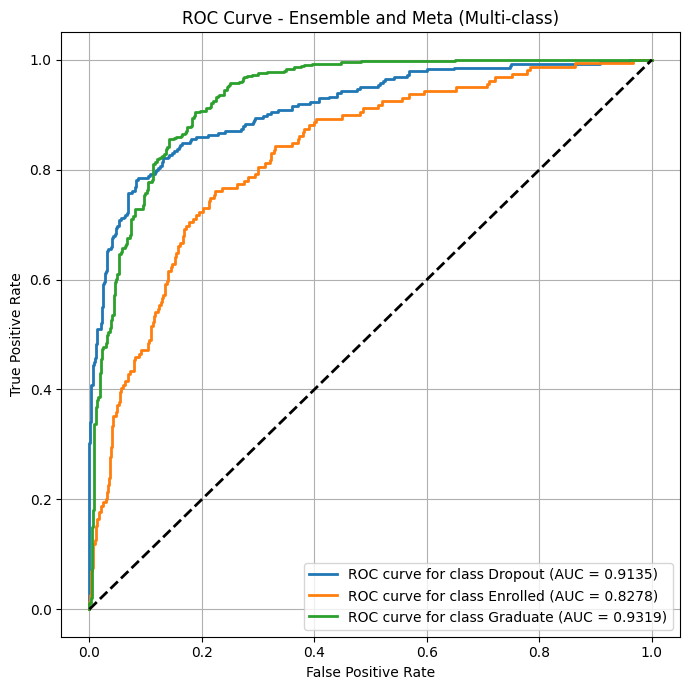

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_proba_meta[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_proba_meta[:, i])

plt.figure(figsize=(7,7))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {["Dropout", "Enrolled", "Graduate"][i]} (AUC = {roc_auc[i]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble and Meta (Multi-class)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Kesimpulan

1. **Performa Keseluruhan:**

   * **Akurasi** model sebesar **78.08%**, menunjukkan model memiliki kinerja yang cukup baik dalam mengklasifikasikan status pengguna (Dropout, Enrolled, Graduate).
   * **Log Loss** sebesar **0.5660** menunjukkan bahwa prediksi model relatif baik.
   * **ROC AUC** sebesar **0.8911** merupakan nilai yang baik, menandakan model memiliki kemampuan diskriminasi tinggi antara kelas-kelas.

2. **Performa per Kelas:**

   * **Graduate** adalah kelas yang paling baik diprediksi dengan precision 0.81 dan recall 0.91. Model sangat andal dalam mengidentifikasi siswa yang lulus.
   * **Dropout** juga memiliki kinerja cukup baik, dengan f1-score 0.79, artinya model cukup berhasil mengenali siswa yang keluar.
   * **Enrolled** menjadi kelas dengan performa paling rendah (**recall hanya 0.43**). Model sering salah klasifikasi status "Enrolled" ke dalam kelas lain.

3. **Macro vs Weighted Average:**

   * **Macro average** f1-score adalah 0.71, rata-rata performa antar kelas tidak merata, terutama karena rendahnya skor pada kelas "Enrolled".
   * **Weighted average** f1-score sebesar 0.77 menunjukkan performa yang tetap solid karena dipengaruhi oleh banyaknya jumlah data pada kelas "Graduate".

* Model dapat diandalkan untuk mendeteksi **Dropout** dan **Graduate**, sehingga dapat digunakan untuk mendukung strategi retensi pengguna.
* Perlu **peningkatan performa pada kelas “Enrolled”**, misalnya dengan penyeimbangan data (SMOTE, undersampling), atau analisis fitur yang lebih dalam untuk membedakan pengguna enrolled vs dropout.

In [ ]:
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(rf, 'rf_model.pkl')
model_dl.save('dl_model.h5')
model_dl.save('dl_model.keras')

## Kesimpulan

### Feature Importance

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


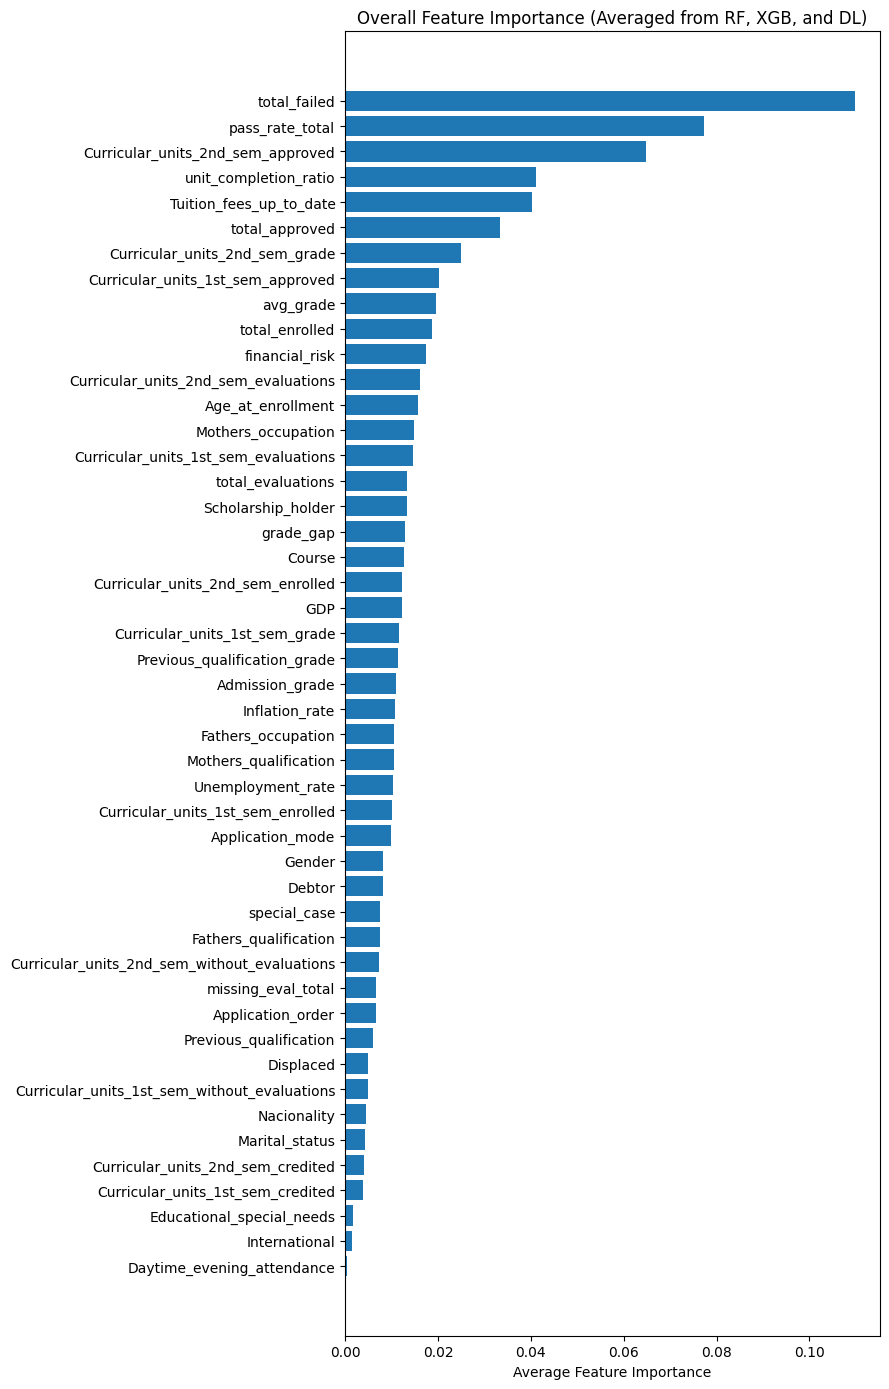

                                         Feature  Average_Importance
43                                  total_failed            0.109728
36                               pass_rate_total            0.077309
30             Curricular_units_2nd_sem_approved            0.064834
44                         unit_completion_ratio            0.041015
16                       Tuition_fees_up_to_date            0.040162
41                                total_approved            0.033288
31                Curricular_units_2nd_sem_grade            0.024963
24             Curricular_units_1st_sem_approved            0.020272
38                                     avg_grade            0.019580
40                                total_enrolled            0.018733
45                                financial_risk            0.017438
29          Curricular_units_2nd_sem_evaluations            0.016086
19                             Age_at_enrollment            0.015730
10                            Moth

In [ ]:
def keras_score(model, X, y):
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)
    return accuracy_score(y, y_pred_classes)

feature_importances_rf = rf.feature_importances_
importance_xgb = xgb_model.feature_importances_
result_dl = permutation_importance(model_dl, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring=keras_score)
feature_importances_dl = result_dl.importances_mean

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'RF_Importance': feature_importances_rf,
    'XGB_Importance': importance_xgb,
    'DL_Importance': feature_importances_dl
})

importance_df['Average_Importance'] = importance_df[['RF_Importance', 'XGB_Importance', 'DL_Importance']].mean(axis=1)
importance_df = importance_df.sort_values(by='Average_Importance', ascending=False)

plt.figure(figsize=(9,14))
plt.barh(importance_df['Feature'], importance_df['Average_Importance'], align='center')
plt.xlabel('Average Feature Importance')
plt.title('Overall Feature Importance (Averaged from RF, XGB, and DL)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(importance_df[['Feature', 'Average_Importance']])

### Kesimpulan Faktor Utama Dropout Mahasiswa


- Mahasiswa dengan banyak mata kuliah yang **tidak lulus** cenderung dropout.  
  - Informasi terkait: `Curricular_units_1st_sem_enrolled`, `Curricular_units_2nd_sem_enrolled`, `Curricular_units_1st_sem_approved`, `Curricular_units_2nd_sem_approved`

- Rasio kelulusan yang **rendah dibanding jumlah mata kuliah yang diambil** sangat berpengaruh terhadap dropout.  
  - Informasi terkait: `Curricular_units_1st_sem_enrolled`, `Curricular_units_2nd_sem_enrolled`, `Curricular_units_1st_sem_approved`, `Curricular_units_2nd_sem_approved`

- Jumlah mata kuliah yang **lulus di semester 2** menjadi indikator penting kelanjutan studi.  
  - Informasi terkait: `Curricular_units_2nd_sem_approved`

- Mahasiswa yang **menunggak pembayaran biaya kuliah** berisiko lebih tinggi untuk keluar.  
  - Informasi terkait: `Tuition_fees_up_to_date`

- Nilai semester yang **rendah** menjadi salah satu pemicu kurangnya motivasi studi.  
  - Informasi terkait: `Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_grade`

### Action Items

Berdasarkan hasil analisis data, berikut adalah rekomendasi tindakan nyata yang dapat diambil oleh pihak institut:

1. Pantau dan Intervensi Mahasiswa dengan Rasio Kelulusan Rendah
  - **Feature terkait:** `Curricular_units_1st_sem_approved`, `Curricular_units_2nd_sem_approved`, `Curricular_units_1st_sem_enrolled`, `Curricular_units_2nd_sem_enrolled`
  - Mahasiswa dengan jumlah mata kuliah yang diambil banyak, tetapi yang lulus sedikit, memiliki **unit_completion_ratio** rendah dan **total_failed** tinggi.
  - **Tindakan:** Buat sistem peringatan dini (early warning system) untuk mengidentifikasi mahasiswa dengan rasio kelulusan < 50% dan tawarkan program mentoring atau remedial.

2. Evaluasi Kinerja Akademik Berdasarkan Nilai Rata-rata Semester
  - **Feature terkait:** `Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_grade`
  - Nilai akademik yang rendah (low `avg_grade`) dapat menjadi indikator motivasi atau kesiapan yang rendah.
  - **Tindakan:** Sediakan sesi konseling akademik atau workshop peningkatan belajar bagi mahasiswa dengan nilai rata-rata < 10.

3. Fokus pada Semester Awal: Penilaian Rasio Kelulusan per Semester
  - **Feature terkait:** `Curricular_units_1st_sem_approved`, `Curricular_units_1st_sem_enrolled`, `Curricular_units_2nd_sem_approved`, `Curricular_units_2nd_sem_enrolled`
  - Rasio kelulusan per semester (`pass_rate_total`) yang rendah menjadi indikator utama risiko dropout.
  - **Tindakan:** Analisis performa per semester untuk mendesain intervensi yang lebih cepat sebelum semester kedua.

4. Perhatikan Mahasiswa dengan Tunggakan Pembayaran
  - **Feature terkait:** `Tuition_fees_up_to_date`
  - Mahasiswa yang belum membayar biaya kuliah tepat waktu menunjukkan risiko finansial yang bisa berdampak pada dropout.
  - **Tindakan:** Sediakan opsi cicilan, bantuan keuangan, atau pengingat berkala agar mahasiswa tetap bisa melanjutkan studi.

5. Buat Laporan Rutin Tentang Rasio Gagal Mahasiswa
  - **Feature terkait:** `Curricular_units_1st_sem_approved`, `Curricular_units_2nd_sem_approved`, `Curricular_units_1st_sem_enrolled`, `Curricular_units_2nd_sem_enrolled`
  - Jumlah `total_failed` yang tinggi menunjukkan ketidaksesuaian beban studi dengan kemampuan mahasiswa.
  - **Tindakan:** Evaluasi kurikulum atau proses pemilihan mata kuliah agar lebih adaptif terhadap kemampuan mahasiswa baru. Dari evaluasi ini, institut dapat bertindak lebih cepat untuk memberikan bimbingan khusus.

## Python Script

In [ ]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Load models dan scaler
xgb_model = joblib.load('xgb_model.pkl')
rf_model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')
label_encoders = joblib.load('label_encoders.pkl')
dl_model = load_model('dl_model.h5')

def input_data():
    print("Masukkan data mahasiswa:")

    marital_status = int(input("Marital status (1: single, 2: married, 3: widower, 4: divorced, 5: facto union, 6: legally separated): "))
    application_mode = int(input("Application mode (1-1st phase, 39-Over 23 years old, 42-Transfer, etc.): "))
    application_order = int(input("Application order (0 - first choice, 9 - last choice): "))
    course = int(input("Course (33 - Biofuel Production Technologies, 171 - Animation and Multimedia Design, etc.): "))
    daytime_evening_attendance = int(input("Daytime/evening attendance (1 – daytime, 0 – evening): "))
    previous_qualification = int(input("Previous qualification (1-Secondary education, 2-Bachelor's degree, etc.): "))

    previous_qualification_grade = float(input("Previous qualification grade (0 to 200): "))
    admission_grade = float(input("Admission grade (0 to 200): "))

    nationality = int(input("Nationality (1-Portuguese, 2-German, etc.): "))
    mothers_qualification = int(input("Mother's qualification (1-Secondary education, 2-Bachelor's degree, etc.): "))
    fathers_qualification = int(input("Father's qualification (1-Secondary education, 2-Bachelor's degree, etc.): "))
    mothers_occupation = int(input("Mother's occupation (0-Student, 1-Executive, etc.): "))
    fathers_occupation = int(input("Father's occupation (0-Student, 1-Executive, etc.): "))
    displaced = int(input("Displaced (1-yes, 0-no): "))
    educational_special_needs = int(input("Educational special needs (1-yes, 0-no): "))
    debtor = int(input("Debtor (1-yes, 0-no): "))
    tuition_fees_up_to_date = int(input("Tuition fees up to date (1-yes, 0-no): "))
    gender = int(input("Gender (1-male, 0-female): "))
    scholarship_holder = int(input("Scholarship holder (1-yes, 0-no): "))
    age_at_enrollment = int(input("Age at enrollment: "))
    international = int(input("International (1-yes, 0-no): "))

    curricular_units_1st_sem_credited = int(input("Curricular units 1st sem (credited): "))
    curricular_units_1st_sem_enrolled = int(input("Curricular units 1st sem (enrolled): "))
    curricular_units_1st_sem_evaluations = int(input("Curricular units 1st sem (evaluations): "))
    curricular_units_1st_sem_approved = int(input("Curricular units 1st sem (approved): "))
    curricular_units_1st_sem_grade = float(input("Curricular units 1st sem (grade): "))
    curricular_units_1st_sem_without_evaluations = int(input("Curricular units 1st sem (without evaluations): "))

    curricular_units_2nd_sem_credited = int(input("Curricular units 2nd sem (credited): "))
    curricular_units_2nd_sem_enrolled = int(input("Curricular units 2nd sem (enrolled): "))
    curricular_units_2nd_sem_evaluations = int(input("Curricular units 2nd sem (evaluations): "))
    curricular_units_2nd_sem_approved = int(input("Curricular units 2nd sem (approved): "))
    curricular_units_2nd_sem_grade = float(input("Curricular units 2nd sem (grade): "))
    curricular_units_2nd_sem_without_evaluations = int(input("Curricular units 2nd sem (without evaluations): "))

    unemployment_rate = float(input("Unemployment rate: "))
    inflation_rate = float(input("Inflation rate: "))
    gdp = float(input("GDP: "))

    data = {
        'Marital_status': marital_status,
        'Application_mode': application_mode,
        'Application_order': application_order,
        'Course': course,
        'Daytime_evening_attendance': daytime_evening_attendance,
        'Previous_qualification': previous_qualification,
        'Previous_qualification_grade': previous_qualification_grade,
        'Nacionality': nationality,
        'Mothers_qualification': mothers_qualification,
        'Fathers_qualification': fathers_qualification,
        'Mothers_occupation': mothers_occupation,
        'Fathers_occupation': fathers_occupation,
        'Admission_grade': admission_grade,
        'Displaced': displaced,
        'Educational_special_needs': educational_special_needs,
        'Debtor': debtor,
        'Tuition_fees_up_to_date': tuition_fees_up_to_date,
        'Gender': gender,
        'Scholarship_holder': scholarship_holder,
        'Age_at_enrollment': age_at_enrollment,
        'International': international,

        'Curricular_units_1st_sem_credited': curricular_units_1st_sem_credited,
        'Curricular_units_1st_sem_enrolled': curricular_units_1st_sem_enrolled,
        'Curricular_units_1st_sem_evaluations': curricular_units_1st_sem_evaluations,
        'Curricular_units_1st_sem_approved': curricular_units_1st_sem_approved,
        'Curricular_units_1st_sem_grade': curricular_units_1st_sem_grade,
        'Curricular_units_1st_sem_without_evaluations': curricular_units_1st_sem_without_evaluations,
        'Curricular_units_2nd_sem_credited': curricular_units_2nd_sem_credited,
        'Curricular_units_2nd_sem_enrolled': curricular_units_2nd_sem_enrolled,
        'Curricular_units_2nd_sem_evaluations': curricular_units_2nd_sem_evaluations,
        'Curricular_units_2nd_sem_approved': curricular_units_2nd_sem_approved,
        'Curricular_units_2nd_sem_grade': curricular_units_2nd_sem_grade,
        'Curricular_units_2nd_sem_without_evaluations': curricular_units_2nd_sem_without_evaluations,
        'Unemployment_rate': unemployment_rate,
        'Inflation_rate': inflation_rate,
        'GDP': gdp
    }

    return pd.DataFrame([data])

df = input_data()

def safe_divide(numerator, denominator):
    return numerator / denominator.replace(0, np.nan)

# feature engineering
df['pass_rate_1st'] = safe_divide(df['Curricular_units_1st_sem_approved'], df['Curricular_units_1st_sem_enrolled'])
df['pass_rate_2nd'] = safe_divide(df['Curricular_units_2nd_sem_approved'], df['Curricular_units_2nd_sem_enrolled'])
df['pass_rate_total'] = safe_divide(
    df['Curricular_units_1st_sem_approved'] + df['Curricular_units_2nd_sem_approved'],
    df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled']
)

df['missing_eval_1st'] = safe_divide(df['Curricular_units_1st_sem_without_evaluations'], df['Curricular_units_1st_sem_enrolled'])
df['missing_eval_2nd'] = safe_divide(df['Curricular_units_2nd_sem_without_evaluations'], df['Curricular_units_2nd_sem_enrolled'])
df['missing_eval_total'] = safe_divide(
    df['Curricular_units_1st_sem_without_evaluations'] + df['Curricular_units_2nd_sem_without_evaluations'],
    df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled']
)

df['avg_grade'] = (df['Curricular_units_1st_sem_grade'] + df['Curricular_units_2nd_sem_grade']) / 2
df['grade_gap'] = df['Admission_grade'] - df['avg_grade']
df['total_enrolled'] = df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled']
df['total_approved'] = df['Curricular_units_1st_sem_approved'] + df['Curricular_units_2nd_sem_approved']
df['total_evaluations'] = df['Curricular_units_1st_sem_evaluations'] + df['Curricular_units_2nd_sem_evaluations']
df['total_failed'] = df['total_enrolled'] - df['total_approved']
df['unit_completion_ratio'] = safe_divide(df['total_approved'], df['total_enrolled'])
df['financial_risk'] = (1 - df['Tuition_fees_up_to_date']) + df['Debtor'] + df['Scholarship_holder']
df['special_case'] = df['Displaced'] + df['Educational_special_needs'] + df['International']

df.fillna(0, inplace=True)
X_input = df.drop(['missing_eval_1st', 'missing_eval_2nd', 'pass_rate_1st', 'pass_rate_2nd'], axis=1, errors='ignore')

# scaling
X_scaled = scaler.transform(X_input)

# predict masing-masing model
proba_rf = rf_model.predict_proba(X_scaled)
proba_xgb = xgb_model.predict_proba(X_scaled)
proba_dl = dl_model.predict(X_scaled)

# ensemble prediction
X_meta = np.hstack([proba_rf, proba_xgb, proba_dl])
final_proba = meta_model.predict_proba(X_meta)
final_pred = np.argmax(final_proba, axis=1)

# mapping label ke nama status
label_encoder_status = label_encoders['Status']
predicted_label = label_encoder_status.inverse_transform(final_pred.astype(int))

print(f"\nPrediksi Status Mahasiswa: {predicted_label[0]}")

Masukkan data mahasiswa:
Marital status (1: single, 2: married, 3: widower, 4: divorced, 5: facto union, 6: legally separated): 1
Application mode (1-1st phase, 39-Over 23 years old, 42-Transfer, etc.): 18
Application order (0 - first choice, 9 - last choice): 3
Course (33 - Biofuel Production Technologies, 171 - Animation and Multimedia Design, etc.): 9070
Daytime/evening attendance (1 – daytime, 0 – evening): 1
Previous qualification (1-Secondary education, 2-Bachelor's degree, etc.): 1
Previous qualification grade (0 to 200): 142
Admission grade (0 to 200): 130.8
Nationality (1-Portuguese, 2-German, etc.): 1
Mother's qualification (1-Secondary education, 2-Bachelor's degree, etc.): 1
Father's qualification (1-Secondary education, 2-Bachelor's degree, etc.): 37
Mother's occupation (0-Student, 1-Executive, etc.): 4
Father's occupation (0-Student, 1-Executive, etc.): 7
Displaced (1-yes, 0-no): 1
Educational special needs (1-yes, 0-no): 0
Debtor (1-yes, 0-no): 0
Tuition fees up to date 

In [ ]:
import joblib
joblib.dump(rf_model, 'rf_model_compressed.pkl', compress=1)

['rf_model_compressed.pkl']

In [ ]:
joblib.dump(meta_model, 'meta_model.pkl')

['meta_model.pkl']